In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
df1 = pd.read_csv("Documents\Bengaluru_House_Data.csv")

In [4]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.shape

(13320, 9)

In [6]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df2 = df1.drop(['area_type', 'society', 'availability'], axis='columns')

In [8]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [9]:
df2.shape

(13320, 6)

In [10]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [11]:
df2 = df2.drop(['balcony'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df3 = df2.dropna()

In [14]:
df3.shape
# df2.shape

(13246, 5)

In [15]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [16]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [17]:
df3['size'] = df3['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [19]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [20]:
df3[df3['size'] > 20]

,location,size,total_sqft,bath,price
1718,2Electronic City Phase II,27,8000,27.0,230.0
4684,Munnekollal,43,2400,40.0,660.0


In [21]:
df3['total_sqft'].describe

<bound method NDFrame.describe of 0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13246, dtype: object>

In [22]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:
df3[df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [25]:
def convert_sqft_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        return ((float(token[0])+float(token[1]))/2)
    try:
        return float(x)
    except:
        return None

In [26]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

In [27]:
df4.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [28]:
df3.loc[30]

location        Yelahanka
size                    4
total_sqft    2100 - 2850
bath                    4
price                 186
Name: 30, dtype: object

In [29]:
df4.loc[30]

location      Yelahanka
size                  4
total_sqft         2475
bath                  4
price               186
Name: 30, dtype: object

In [30]:
df5 = df4.copy()

In [31]:
df5.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [32]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']

In [33]:
df5.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [34]:
len(df5.location.unique())

1304

In [35]:
# df5.location = df5.location.apply(lambda x: x.strip())
for x in df5.location:
    x.strip()

In [36]:
df5.location.head()

0    Electronic City Phase II
1            Chikka Tirupathi
2                 Uttarahalli
3          Lingadheeranahalli
4                    Kothanur
Name: location, dtype: object

In [37]:
df4.location.head()

0    Electronic City Phase II
1            Chikka Tirupathi
2                 Uttarahalli
3          Lingadheeranahalli
4                    Kothanur
Name: location, dtype: object

In [38]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [39]:
location_stats.agg('count')

1304

In [40]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [41]:
location_stats_less_than_10.head()

location
Ganga Nagar             10
Nagappa Reddy Layout    10
BTM 1st Stage           10
Dodsworth Layout        10
Kalkere                 10
Name: location, dtype: int64

In [42]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [43]:
df5.head(10)

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,3247.863248
6,Old Airport Road,4,2732.0,4.0,204.00,7467.057101
7,Rajaji Nagar,4,3300.0,4.0,600.00,18181.818182
8,Marathahalli,3,1310.0,3.0,63.25,4828.244275
9,other,6,1020.0,6.0,370.00,36274.509804


In [44]:
# df5.iloc[410]
print(df5[df5.total_sqft/df5.size<300].head())
print(df5[(df5['total_sqft']/df5['size']<300)].head())
#df5['total_sqft'].describe()

                   location  size  total_sqft  bath   price  price_per_sqft
0  Electronic City Phase II     2      1056.0   2.0   39.07     3699.810606
1          Chikka Tirupathi     4      2600.0   5.0  120.00     4615.384615
2               Uttarahalli     3      1440.0   2.0   62.00     4305.555556
3        Lingadheeranahalli     3      1521.0   3.0   95.00     6245.890861
4                  Kothanur     2      1200.0   2.0   51.00     4250.000000
         location  size  total_sqft  bath  price  price_per_sqft
9           other     6      1020.0   6.0  370.0    36274.509804
45     HSR Layout     8       600.0   9.0  200.0    33333.333333
58  Murugeshpalya     6      1407.0   4.0  150.0    10660.980810
68          other     8      1350.0   7.0   85.0     6296.296296
70          other     3       500.0   3.0  100.0    20000.000000


In [45]:
len(df5.location.unique())

242

In [46]:
df6 = df5[-(df5['total_sqft']/df5['size']<300)]

In [47]:
df6.shape

(12502, 6)

In [48]:
df6.groupby('location')['location']

In [49]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out

In [50]:
df7 = remove_pps_outlier(df6)
print(df7.shape)

(10244, 6)


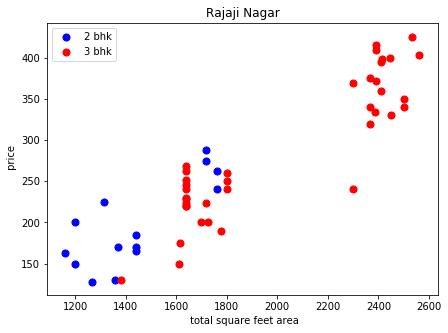

In [51]:
def plot_scatter_chart(df, location):
    bhk2 = df[((df.location==location) & (df['size']==2))]
    bhk3 = df[((df.location==location) & (df['size']==3))]
    matplotlib.rcParams['figure.figsize'] = (7,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='red',label='3 bhk',s=50)
    plt.xlabel(' total square feet area')
    plt.ylabel(' price')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [52]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [53]:
df8 = remove_bhk_outliers(df7)

In [54]:
df8.shape

(7342, 6)

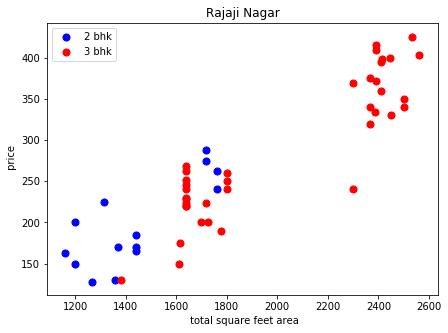

In [55]:
plot_scatter_chart(df7,"Rajaji Nagar")

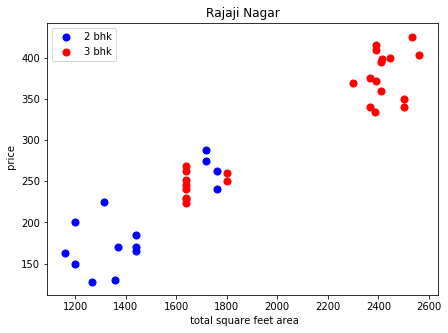

In [56]:
plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'count')

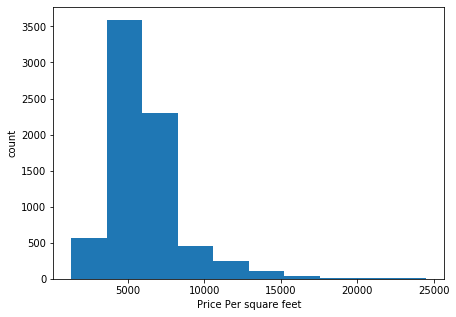

In [57]:
plt.hist(df8.price_per_sqft)
plt.xlabel('Price Per square feet')
plt.ylabel('count')

Text(0, 0.5, 'count')

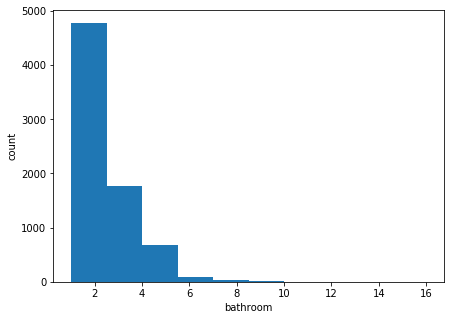

In [58]:
plt.hist(df8.bath)
plt.xlabel('bathroom')
plt.ylabel('count')

In [59]:
df8[df8.bath>df8['size']+2]

,location,size,total_sqft,bath,price,price_per_sqft
1637,Chikkabanavar,4,2460.0,7.0,80.0,3252.032520
5232,Nagasandra,4,7000.0,8.0,450.0,6428.571429
6702,Thanisandra,3,1806.0,6.0,116.0,6423.034330
8405,other,6,11338.0,9.0,1000.0,8819.897689


In [60]:
df9 = df8[df8.bath<df8['size']+2]
df9.shape

(7264, 6)

In [61]:
df10 = df9.drop('price_per_sqft', axis='columns')

In [62]:
dummies = pd.get_dummies(df10.location)
dummies.shape

(7264, 242)

In [63]:
df11 = pd.concat([df10,dummies.drop('other', axis='columns')], axis='columns')

In [64]:
df12 = df11.drop('location', axis='columns')

In [65]:
df12.shape

(7264, 245)

In [66]:
X = df12.drop('price', axis= 'columns')

In [67]:
y = df12.price
y.head()


1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [69]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8262215068143507

In [70]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.82622151, 0.81408431, 0.87757267, 0.84822717, 0.86091226])

In [71]:
# grid search cv 
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' :{
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model' : Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
    

In [72]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.845404,{'normalize': True}
1,lasso,0.709511,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.706960,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [73]:
X.columns

Index(['size', 'total_sqft', 'bath', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [74]:
loc_index = np.where(X.columns == 'Whitefield')[0][0]
loc_index
X.head()
# len(X.columns)

,size,total_sqft,bath,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2,1250.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1200.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1170.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1425.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,947.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = sqft
    x[2] = bath
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [76]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

83.8790192231543

In [77]:
import pickle
with open('Real Estate Price Prediction.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

In [78]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))